In [11]:
!pip install opencv-python

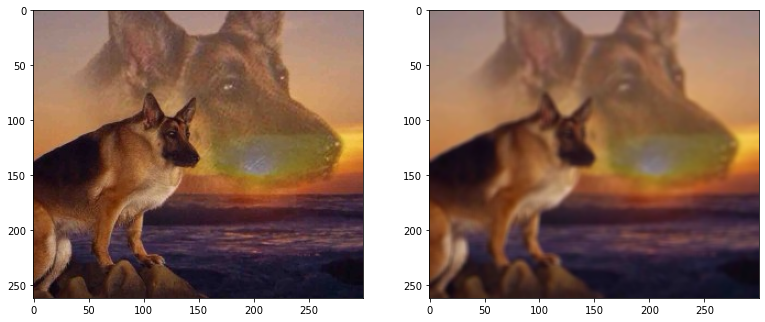

In [2]:
import cv2
import matplotlib.pyplot as plt
import math
import copy
import numpy as np
 
img = cv2.imread('image.jpg')
#gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

rgb_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
box = cv2.boxFilter(rgb_img,-1,(5,5),normalize=True)
 
plt.figure(figsize=(13,13))
plt.subplot (1,2,1)
plt.imshow (rgb_img)
plt.subplot(1,2,2)
plt.imshow(box)
 
plt.show()

<h2>Оценка времени выполнения</h2>

In [4]:
%%timeit -r 4 -n 1000
import cv2
import matplotlib.pyplot as plt
import math
import copy
import numpy as np
 
img = cv2.imread('image.jpg')

rgb_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
box = cv2.boxFilter(rgb_img,-1,(5,5),normalize=True)

2.06 ms ± 58 µs per loop (mean ± std. dev. of 4 runs, 1000 loops each)


<h2>Оценка зависимости времени выполнения от размера Box фильтра</h2>

[0.025635399999998754, 0.023795699999993758, 0.022096799999985706, 0.024616999999977907, 0.022888199999982817, 0.05927330000000097, 0.025225699999992912]


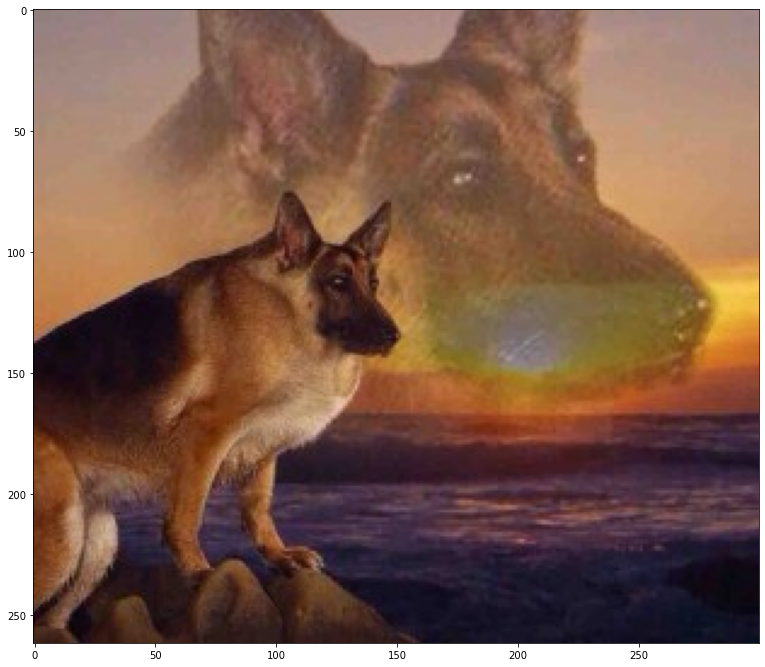

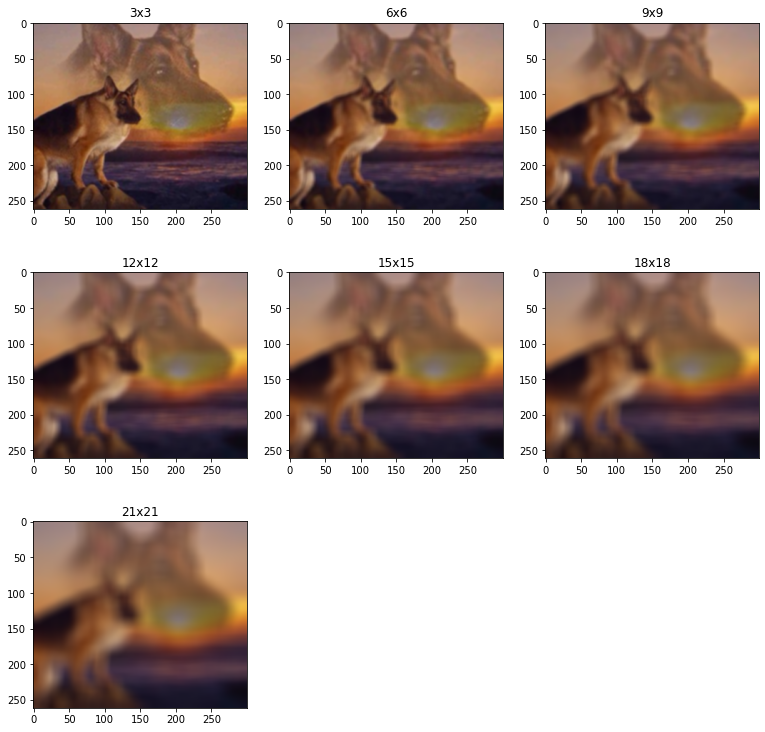

In [5]:
import time

runtime = []
ksize = [3, 6, 9, 12, 15, 18, 21]
img = cv2.imread("image.jpg")

rgb_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(13,13))
plt.imshow (rgb_img)

fig = plt.figure(figsize=(13, 13))


for idx, size in enumerate(ksize):
    start_time = time.perf_counter()
    box = cv2.boxFilter(rgb_img,-1,(size,size),normalize=True)
    fig.add_subplot(3, 3, idx + 1)
    plt.title(f"{size}x{size}")
    plt.imshow(box)
    runtime.append(time.perf_counter() - start_time)

print(runtime)

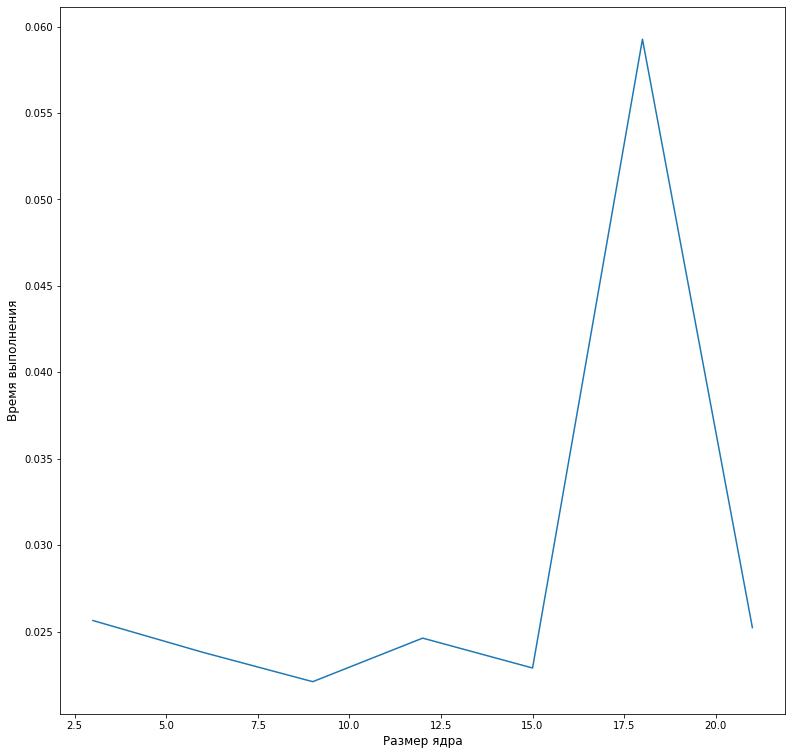

In [6]:
fig2 = plt.figure(figsize=(13,13))
plt.plot(ksize, runtime)
plt.xlabel('Размер ядра', fontsize=12)
plt.ylabel('Время выполнения', fontsize=12)
plt.show()

<h2>Сравнение с фильтрацией Гаусса</h2>

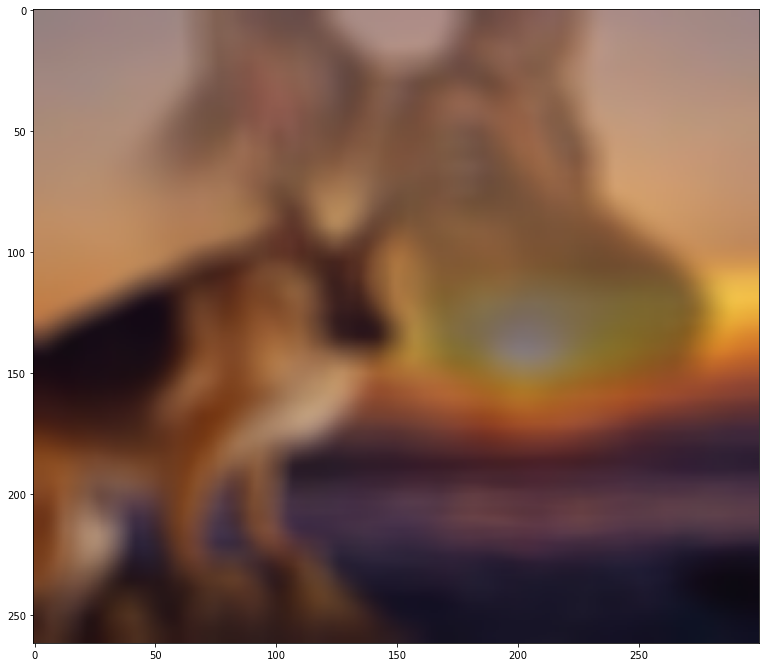

In [15]:
img = cv2.imread('image.jpg')

rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
box = cv2.boxFilter(rgb_img, -1, (15,15), normalize=True)
 
plt.figure(figsize=(13,13))
plt.imshow(box)
 
plt.show()

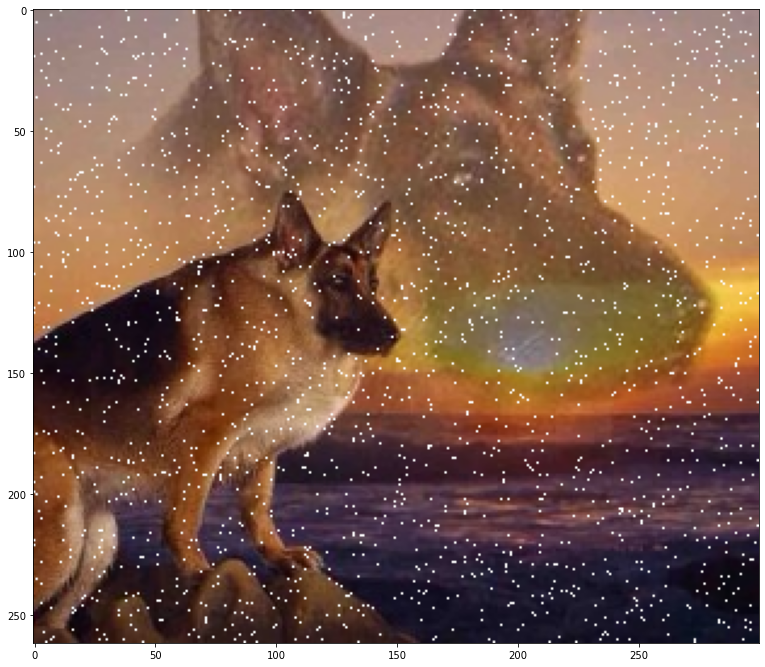

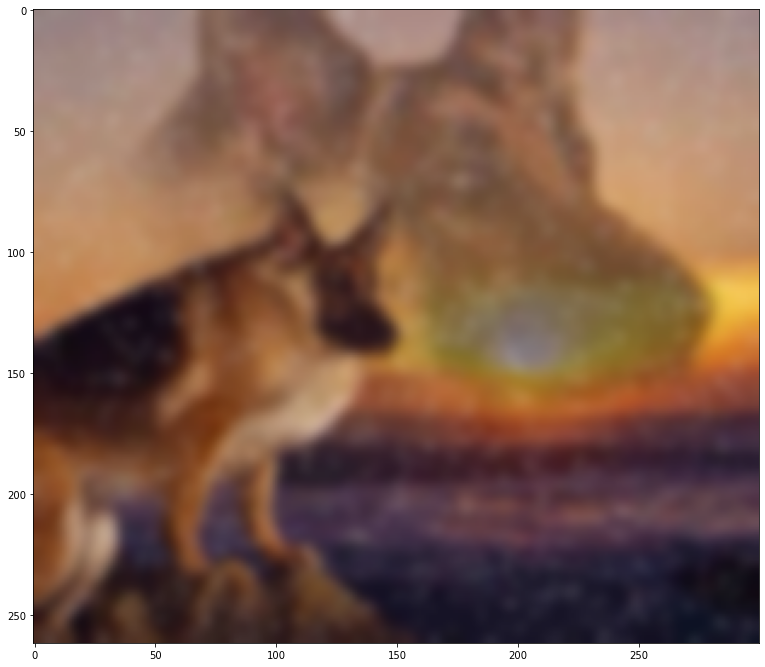

In [16]:
img = cv2.imread('image.jpg')
rgb_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

for i in range(2000):  
    temp_x = np.random.randint(0, rgb_img.shape[0])
    temp_y = np.random.randint(0, rgb_img.shape[1])
    rgb_img[temp_x][temp_y] = 255

plt.figure(figsize=(13,13))
plt.imshow(rgb_img)

gauss = cv2.GaussianBlur(rgb_img,(15,15),0)
plt.figure(figsize=(13,13))
plt.imshow(gauss)


plt.show()

При одинаковом размере ядра свёртки Box фильтрация сильнее размывает фотографию. Гаусс фильтрация позволяет избавиться от шумов на изображении. Размер ядра свёртки для Гауссовской фильтрации должен быть нечётным.